In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


ny = pd.read_json("/Users/dunyenghuh/Desktop/Kaggle/twitter_classification_project/new_york.json", lines=True)
print(ny.shape)
print(ny.columns)
ny.head()

(4723, 36)
Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'extended_tweet', 'favorite_count',
       'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'reply_count', 'retweet_count', 'retweeted', 'source', 'text',
       'timestamp_ms', 'truncated', 'user', 'withheld_in_countries'],
      dtype='object')


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_permalink,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user,withheld_in_countries
0,NaN,None,2018-07-26 13:32:33,"[16, 32]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",@DelgadoforNY19 Calendar marked.,2018-07-26 13:32:33.060,False,"{'id': 316616881, 'id_str': '316616881', 'name...",NaN
1,NaN,None,2018-07-26 13:32:34,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",petition to ban more than one spritz of cologne,2018-07-26 13:32:34.697,False,"{'id': 23692064, 'id_str': '23692064', 'name':...",NaN
2,NaN,None,2018-07-26 13:32:35,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",People really be making up beef with you in th...,2018-07-26 13:32:35.474,False,"{'id': 219516383, 'id_str': '219516383', 'name...",NaN
3,NaN,"{'type': 'Point', 'coordinates': [-73.99905224...",2018-07-26 13:32:36,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '30 years old.. wow what a journ...,0,False,low,...,NaN,0,0,False,"<a href=""http://instagram.com"" rel=""nofollow"">...",30 years old.. wow what a journey... I moved t...,2018-07-26 13:32:36.186,True,"{'id': 294201642, 'id_str': '294201642', 'name...",NaN
4,NaN,None,2018-07-26 13:32:36,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'At first glance it looked like ...,0,False,low,...,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",At first glance it looked like asparagus with ...,2018-07-26 13:32:36.311,True,"{'id': 455408518, 'id_str': '455408518', 'name...",NaN


In [27]:
london = pd.read_json("/Users/dunyenghuh/Desktop/Kaggle/twitter_classification_project/london.json", lines=True)
print(london.shape)
print(london.columns)
london.head()

(5341, 35)
Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'extended_tweet', 'favorite_count',
       'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'reply_count', 'retweet_count', 'retweeted', 'source', 'text',
       'timestamp_ms', 'truncated', 'user'],
      dtype='object')


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,NaN,None,2018-07-26 13:39:30,"[11, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '@bbclaurak i agree Laura but th...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@bbclaurak i agree Laura but the Party you see...,2018-07-26 13:39:30.109,True,"{'id': 340170806, 'id_str': '340170806', 'name..."
1,NaN,None,2018-07-26 13:39:30,"[17, 21]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@masturbacaolove Why?,2018-07-26 13:39:30.400,False,"{'id': 200812090, 'id_str': '200812090', 'name..."
2,NaN,None,2018-07-26 13:39:31,"[30, 65]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@JackRobinson80 @pgroresearch Yeah not great b...,2018-07-26 13:39:31.357,False,"{'id': 771664493898182656, 'id_str': '77166449..."
3,NaN,None,2018-07-26 13:39:33,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Penalty shit out Arsenal,2018-07-26 13:39:33.683,False,"{'id': 968613220893290496, 'id_str': '96861322..."
4,NaN,None,2018-07-26 13:39:36,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Obviously need some pen practice 🙈,2018-07-26 13:39:36.744,False,"{'id': 787646625942478848, 'id_str': '78764662..."


In [28]:
paris = pd.read_json("/Users/dunyenghuh/Desktop/Kaggle/twitter_classification_project/paris.json", lines=True)
print(paris.shape)
print(paris.columns)
paris.head()

(2510, 35)
Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'extended_tweet', 'favorite_count',
       'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'reply_count', 'retweet_count', 'retweeted', 'source', 'text',
       'timestamp_ms', 'truncated', 'user'],
      dtype='object')


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,NaN,None,2018-07-27 17:40:45,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",Bulletin météo parisien : des grêlons énormes ...,2018-07-27 17:40:45.854,False,"{'id': 898983688960167936, 'id_str': '89898368..."
1,NaN,None,2018-07-27 17:40:47,"[0, 26]","{'hashtags': [{'text': 'USORCL', 'indices': [1...","{'media': [{'id': 1022899599336525825, 'id_str...",NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Prêt pour le match #USORCL https://t.co/V5jw0S...,2018-07-27 17:40:47.083,False,"{'id': 734447481937920002, 'id_str': '73444748..."
2,NaN,None,2018-07-27 17:40:50,"[0, 111]","{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1022899571884744706, 'id_str...",NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",MAIS QOIDBDNND'SLS'SLSLLSLS''D DBDODNDNODJDBKD...,2018-07-27 17:40:50.061,False,"{'id': 2161235005, 'id_str': '2161235005', 'na..."
3,NaN,None,2018-07-27 17:40:57,"[9, 50]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",@ToursFC Où peut on le championnat de National...,2018-07-27 17:40:57.048,False,"{'id': 814872139, 'id_str': '814872139', 'name..."
4,NaN,None,2018-07-27 17:40:57,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Les tismey ils sont bas qu’a tromper leur go e...,2018-07-27 17:40:57.367,False,"{'id': 947517995047424006, 'id_str': '94751799..."


In [29]:
ny.isnull().sum() / len(ny)

contributors                 1.000000
coordinates                  0.858564
created_at                   0.000000
display_text_range           0.404827
entities                     0.000000
extended_entities            0.904510
extended_tweet               0.740207
favorite_count               0.000000
favorited                    0.000000
filter_level                 0.000000
geo                          0.858564
id                           0.000000
id_str                       0.000000
in_reply_to_screen_name      0.612746
in_reply_to_status_id        0.646835
in_reply_to_status_id_str    0.646835
in_reply_to_user_id          0.612746
in_reply_to_user_id_str      0.612746
is_quote_status              0.000000
lang                         0.000000
place                        0.000000
possibly_sensitive           0.515986
quote_count                  0.000000
quoted_status                0.831675
quoted_status_id             0.831675
quoted_status_id_str         0.831675
quoted_statu

In [30]:
all_tweet = ny.text.tolist() + paris.text.tolist() + london.text.tolist()
labels = [0] * len(ny.text.tolist()) + [1] * len(london.text.tolist()) + [2] * len(paris.text.tolist())


In [31]:
train_x, test_x, train_y, test_y = train_test_split(all_tweet, labels)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_x)
train_counts = counter.transform(train_x)
test_counts = counter.transform(test_x)

print(train_x[3])
print(train_counts[3])

Does this count as a snack? (@ KazuNori: The Original Hand Roll Bar in New York, NY) https://t.co/pmGnCZqEdj
  (0, 2827)	1
  (0, 3407)	1
  (0, 5918)	1
  (0, 6508)	1
  (0, 7941)	1
  (0, 11702)	1
  (0, 12469)	1
  (0, 12938)	1
  (0, 14374)	1
  (0, 17944)	1
  (0, 18427)	1
  (0, 18957)	1
  (0, 20076)	1
  (0, 22265)	1
  (0, 23823)	1
  (0, 25479)	1
  (0, 25677)	1
  (0, 28863)	1


In [33]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, train_y)
predictions = classifier.predict(test_counts)

In [34]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y, predictions))

#disappointing result of 0.57

0.589058524173028


In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_y, predictions))

[[1058   97   22]
 [ 548  682   77]
 [ 421  127  112]]


## Viral Tweets

In [36]:
random = pd.read_json("/Users/dunyenghuh/Desktop/Kaggle/twitter_classification_project/random_tweets.json", lines=True)

print(len(random))
print(random.columns)
print(random.loc[0]['text'])
print(random.loc[0]['user']['location'])

11099
Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
Waterloo, Iowa


In [51]:
random.possibly_sensitive.value_counts()

0.0    3123
1.0      69
Name: possibly_sensitive, dtype: int64

In [52]:
random.lang.value_counts()

en     10623
ja       176
tl        61
ko        47
in        40
und       36
es        28
th        16
pt        15
fr        13
it         9
ru         5
de         3
zh         3
ca         3
vi         3
ar         3
nl         2
tr         2
pl         1
fi         1
hi         1
ur         1
fa         1
ro         1
el         1
sl         1
ht         1
et         1
sv         1
Name: lang, dtype: int64

In [55]:
random.favorite_count.value_counts()

0      10873
1        180
2         24
3          9
4          6
5          2
7          1
14         1
6          1
101        1
21         1
Name: favorite_count, dtype: int64

In [41]:
median_retweets = random['retweet_count'].median()
print(median_retweets)
random['is_viral'] = np.where(random['retweet_count'] >= 100, 1, 0)
print(random['is_viral'].value_counts())

13.0
0    7047
1    4052
Name: is_viral, dtype: int64


In [61]:
random['tweet_length'] = random.apply(lambda tweet: len(tweet['text']), axis=1)
random['followers_count'] = random.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
random['friends_count'] = random.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

random.shape

(11099, 35)

In [60]:
# I think favorite counts, language, tweet length, followers count and friends count all matters to a tweet becoming viral. 
# Lets take a look

from sklearn.preprocessing import OneHotEncoder

data = random[['tweet_length','followers_count','friends_count','favorite_count']]

OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

label = LabelEncoder()
label_categorical = pd.DataFrame(label.fit_transform(random['lang']))

label_categorical.head()

OH_categorical = pd.DataFrame(OH_encoder.fit_transform(label_categorical))

OH_categorical.index =  random.index

OH_categorical

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
all_data = pd.concat([data,OH_categorical], axis =1)
all_data.head()



,tweet_length,followers_count,friends_count,favorite_count,0,1,2,3,4,5,...,20,21,22,23,24,25,26,27,28,29
0,140,215,335,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77,199,203,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,140,196,558,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,140,3313,2272,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,140,125,273,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
y = random.is_viral

In [68]:
train_x, test_x, train_y, test_y = train_test_split(all_data, y)
train1, test1, train2,test2 = train_test_split(data, y)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_x, train_y)
print(classifier.score(test_x, test_y))

classifier.fit(train1,train2)
print(classifier.score(test1,test2))

0.5981981981981982
0.5927927927927928


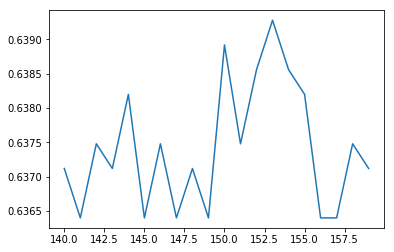

In [76]:
## below lines of code can be used to find the best value for K 
import matplotlib.pyplot as plt

scores = []
for k in range(140, 160):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y)
    scores.append(classifier.score(test_x, test_y))
    
plt.plot(range(140,160), scores)
plt.show()

##best K is 153. 


In [77]:
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 153)
classifier.fit(train_x, train_y)
pred = classifier.predict(test_x)

print(accuracy_score(test_y, pred))

0.6392792792792793
